In [1]:
import pandas as pd

In [2]:
business_df = pd.read_json('../dataset/dataset/business.json',orient='records', lines=True)


In [3]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 19.1+ MB


In [4]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{'RestaurantsTableService': False, 'GoodForMea...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [5]:
%matplotlib inline
import missingno as msno

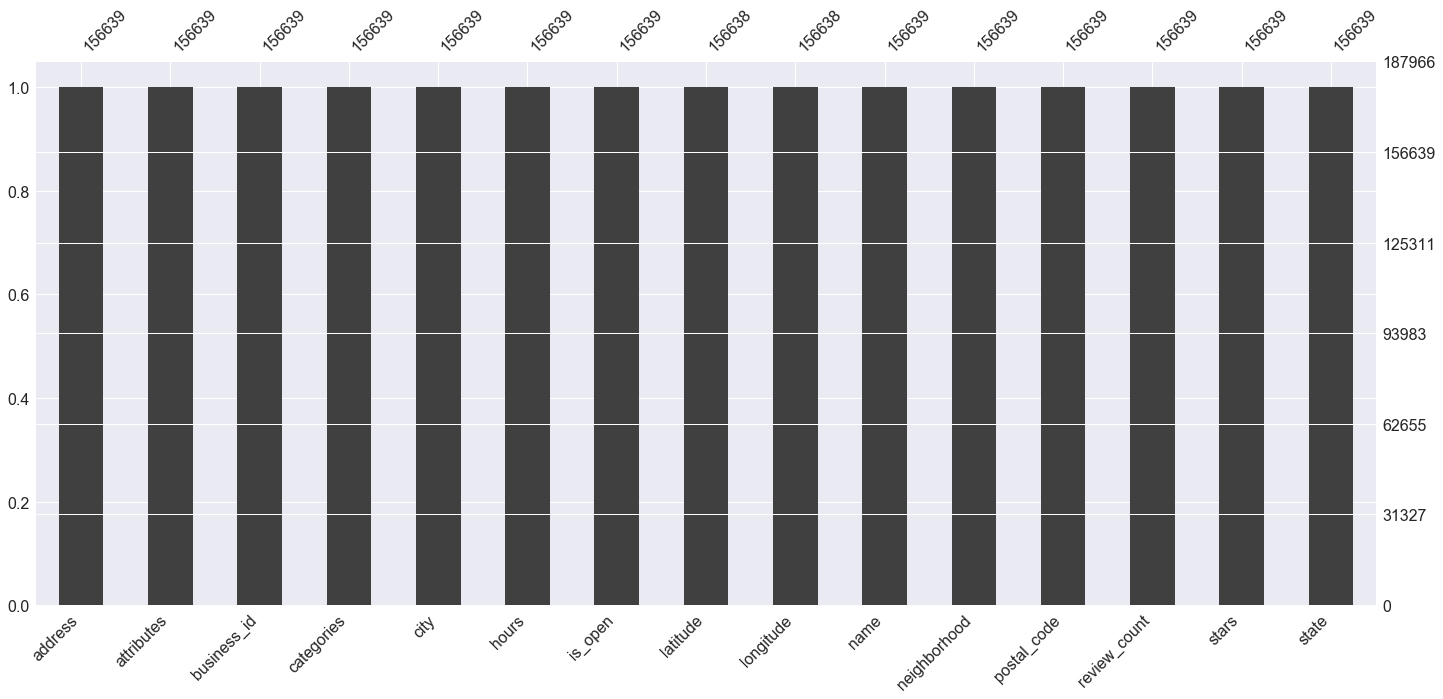

In [6]:
msno.bar(business_df)

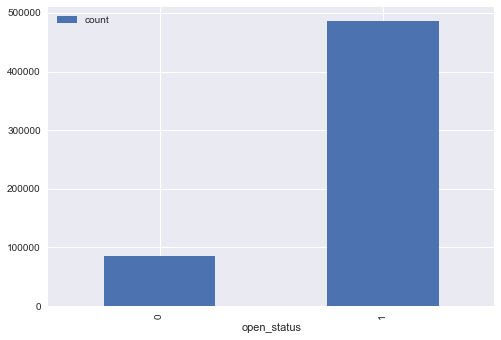

In [7]:
grouped_business_by_status = business_df[['is_open','stars']].groupby(by='is_open').sum().reset_index()
grouped_business_by_status.columns = ['open_status', 'count']
grouped_business_by_status.plot(kind='bar', x='open_status', y='count')


In [8]:
# eliminate restaurants that are closed
business_df = business_df[business_df['is_open'] == 1]

In [9]:
business_df.shape

(132262, 15)

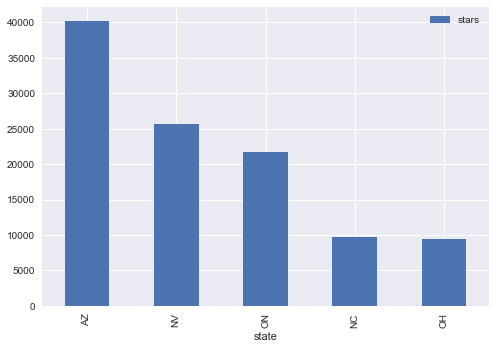

In [10]:
most_business_info = business_df[['state', 'stars']].groupby(by='state').count().reset_index().sort_values(by='stars', ascending=False).head(5)
most_business_info.plot(kind='bar', x='state', y='stars')

In [11]:
top_states = most_business_info['state']
business_df_top_states = business_df[business_df['state'].isin(top_states)]
business_df_top_states.shape

(106782, 15)

In [12]:
state_cat_dict = dict()
def check_row(row) :
    state = row['state']
    categories = row.categories
    if state in state_cat_dict :
        state_obj = state_cat_dict[state]
        for cat in categories :
            if cat in state_obj :
                #cat exist
                state_obj[cat] = state_obj[cat] + 1
            else :
                # cat does not exist in dict
                state_obj[cat] = 1
        state_cat_dict[state] = state_obj
    else :
        # new state
        state_obj = dict()
        for cat in categories :
            state_obj[cat] = 1
        state_cat_dict[state] = state_obj
        
temp = business_df_top_states.apply(lambda x : check_row(x), axis=1)


In [13]:
cat_dict = dict()
def check_row(row) :

    categories = row.categories
    for cat in categories :
        if cat in cat_dict :
            #cat exist
            cat_dict[cat] = cat_dict[cat] + 1
        else :
            # cat does not exist in dict
            cat_dict[cat] = 1
    
    
        
temp = business_df_top_states.apply(lambda x : check_row(x), axis=1)


In [14]:
cherry_picked_cat = ['Restaurants','Food','Nightlife','Bars','Fast Food','Sandwiches',
 'American (Traditional)','Pizza','Coffee & Tea','Burgers','Mexican','Breakfast & Brunch','Specialty Food',
 'Chinese','Italian','American (New)','Bakeries','Desserts','Chicken Wings','Salad','Beer','Wine & Spirits',
 'Pubs','Sushi Bars','Delis','Juice Bars & Smoothies','Steakhouses'
]
len(cherry_picked_cat)

27

In [15]:
state_cat_dict.keys()

dict_keys(['OH', 'AZ', 'NV', 'NC', 'ON'])

In [16]:
def check_if_restaurant(categories):
    for cat in categories :
        if cat in cherry_picked_cat :
            return True
    return False
    

In [17]:
business_df_top_states['restaurant'] = business_df_top_states.apply(lambda x : check_if_restaurant(x['categories']), axis = 1)


/Users/deveshkandpal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
business_df_top_states = business_df_top_states[business_df_top_states['restaurant'] == True]

In [22]:
business_df_top_states.drop('restaurant', axis=1, inplace=True)

In [24]:
business_df_top_states.to_json('filtered_business.json', orient='records', lines=True)

In [27]:
filtered_business_df = pd.read_json('filtered_business.json',orient='records', lines=True)
filtered_business_df.shape

(38281, 15)

list